In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as dates
import mpl_finance as candle
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
from pylab import rcParams


%matplotlib inline

In [2]:
blue_chips = pd.read_csv('BLUECHIPS')

In [3]:
blue_chips.iloc[6]

CODIGO DE NEGOCIACAO DO PAPEL    PETR3
Name: 6, dtype: object

In [4]:
df_relacoes = pd.DataFrame()
for blue_chip in blue_chips['CODIGO DE NEGOCIACAO DO PAPEL']:
    df_relacoes[blue_chip] = pd.read_csv('HISTORICO_2018/' + blue_chip + '_2018')['PRECO FECHAMENTO']

df_relacoes.head()

,PETR4,VALE3,ITUB4,BBDC4,BBAS3,ABEV3,PETR3,ITSA4,SUZB3,GGBR4,...,POMO4,CPFE3,EZTC3,PARD3,TUPY3,VLID3,ALSC3,MPLU3,MAGG3,ALPA4
0,16.55,41.72,43.88,34.60,32.93,21.69,17.33,11.03,18.79,12.97,...,3.94,19.43,22.12,33.50,18.74,19.20,18.05,35.48,49.25,17.60
1,16.70,41.47,44.18,34.74,33.35,21.74,17.55,11.16,18.65,12.95,...,4.05,19.19,21.94,33.20,18.88,19.49,18.16,35.85,50.02,17.17
2,16.73,41.64,45.10,35.31,33.67,21.62,17.70,11.37,18.70,13.65,...,4.17,19.05,22.30,33.07,19.56,19.49,18.13,35.94,51.20,17.15
3,16.83,42.29,45.23,35.51,33.67,21.70,17.84,11.39,18.65,13.48,...,4.12,18.74,21.74,32.38,19.58,19.45,18.05,36.01,51.89,17.45
4,17.03,43.23,45.08,35.50,33.75,21.66,18.12,11.38,19.10,13.95,...,4.04,19.04,21.84,32.00,19.20,19.40,17.99,36.01,51.75,17.10


In [5]:
corr_pearson = df_relacoes.corr(method='pearson')
corr_kendall = df_relacoes.corr(method='kendall')
corr_spearman = df_relacoes.corr(method='spearman')

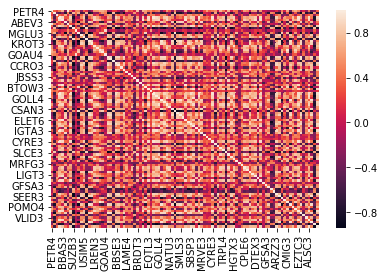

In [6]:
sns.heatmap(corr_pearson)

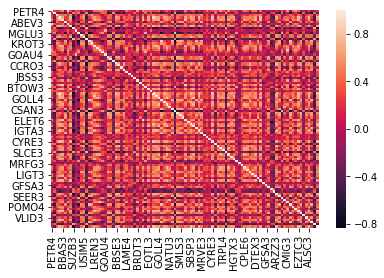

In [7]:
sns.heatmap(corr_kendall)

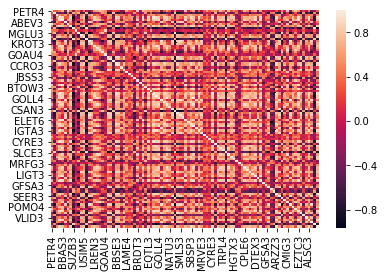

In [8]:
sns.heatmap(corr_spearman)

In [9]:
corr_spearman.head()

,PETR4,VALE3,ITUB4,BBDC4,BBAS3,ABEV3,PETR3,ITSA4,SUZB3,GGBR4,...,POMO4,CPFE3,EZTC3,PARD3,TUPY3,VLID3,ALSC3,MPLU3,MAGG3,ALPA4
PETR4,1.000000,0.331663,0.323149,0.475865,0.715659,-0.186155,0.979326,0.488712,-0.212612,0.459573,...,0.521849,0.743295,0.539884,-0.121362,0.159221,-0.137809,0.433152,-0.380034,-0.227448,0.329228
VALE3,0.331663,1.000000,-0.350583,-0.486995,-0.212404,-0.667860,0.449586,-0.554478,0.678254,0.398086,...,-0.281253,0.288908,-0.397676,-0.838623,0.586766,-0.658942,-0.505840,-0.842438,0.526428,-0.605444
ITUB4,0.323149,-0.350583,1.000000,0.546036,0.388511,0.620262,0.204317,0.687169,-0.559096,0.332735,...,0.350098,0.078193,0.436980,0.499700,-0.424275,0.366915,0.401285,0.520576,-0.287145,0.527764
BBDC4,0.475865,-0.486995,0.546036,1.000000,0.890221,0.306206,0.338368,0.884249,-0.868097,-0.020340,...,0.765660,0.387201,0.945241,0.613137,-0.243774,0.530163,0.919772,0.386193,-0.764463,0.903381
BBAS3,0.715659,-0.212404,0.388511,0.890221,1.000000,-0.000186,0.612352,0.763919,-0.707600,0.058217,...,0.742926,0.674559,0.926846,0.320788,-0.114019,0.258467,0.870400,0.064403,-0.726597,0.773806


In [10]:
# TODO: ESCOLHER MELHOR QUAIS RESTRIÇÕES DE RELAÇÕES
boa_cor_qtd = 0
par1 = []
par2 = []
correlacao = []
for row in range(len(blue_chips['CODIGO DE NEGOCIACAO DO PAPEL'])):
    for blue_chip in blue_chips['CODIGO DE NEGOCIACAO DO PAPEL']:
        if corr_pearson.iloc[row][blue_chip] > .95:
            if corr_spearman.iloc[row][blue_chip] > .55:
                if corr_kendall.iloc[row][blue_chip] > .55:
                    if blue_chip != blue_chips['CODIGO DE NEGOCIACAO DO PAPEL'].iloc[row]:
                        boa_cor_qtd = boa_cor_qtd + 1
                        par1.append(blue_chip)
                        par2.append(blue_chips['CODIGO DE NEGOCIACAO DO PAPEL'].iloc[row])
                        correlacao.append(corr_pearson.iloc[row][blue_chip])


In [11]:
df = pd.DataFrame()
df['Empresa1'] = par1
df['Empresa2'] = par2
df['Correlacao'] = correlacao

df = df.sort_values(by=['Correlacao'],ascending=False).reset_index()
len(df)

26

In [12]:
df = pd.DataFrame()
df['Empresa1'] = par1
df['Empresa2'] = par2
df['Correlacao'] = correlacao
par1 = []
par2 = []
correlacao = []
df = df.sort_values(by=['Correlacao'],ascending=False).reset_index()

for row in range(int(len(df)/2)):
    row = row*2
    par1.append(df.iloc[row]['Empresa1'])
    par2.append(df.iloc[row]['Empresa2'])
    correlacao.append(df.iloc[row+1]['Correlacao'])
    
df_pares = pd.DataFrame()
df_pares['Empresa1'] = par1
df_pares['Empresa2'] = par2
df_pares['Correlacao'] = correlacao

In [13]:
df_pares

,Empresa1,Empresa2,Correlacao
0,ELET3,ELET6,0.993322
1,CMIG4,CMIG3,0.991439
2,PETR3,PETR4,0.981360
3,BBDC3,BBDC4,0.978631
4,PARD3,UGPA3,0.966861
5,BBAS3,ELET3,0.966467
6,ELET6,BBAS3,0.964377
7,BBDC4,CYRE3,0.961438
8,EZTC3,CYRE3,0.959813
9,QUAL3,CIEL3,0.957738


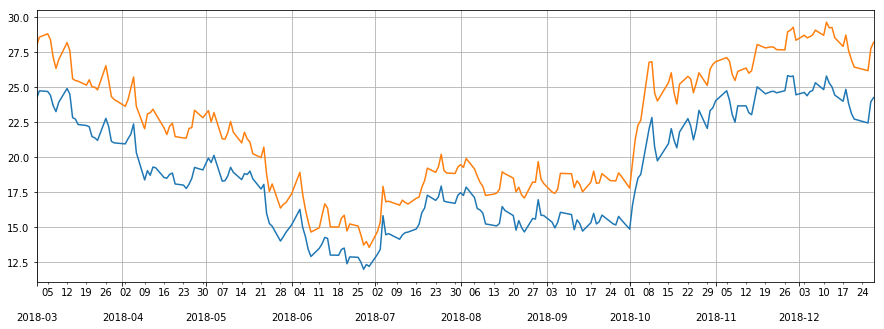

In [39]:
stock1 = pd.read_csv('HISTORICO_2018/ELET3_2018', index_col = 'DATA DO PREGAO', parse_dates=True)
stock2 = pd.read_csv('HISTORICO_2018/ELET6_2018', index_col = 'DATA DO PREGAO', parse_dates=True)

params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

fig, ax = plt.subplots()


ax.plot(stock1['PRECO FECHAMENTO'])
ax.plot(stock2['PRECO FECHAMENTO'])


title_stg = stock1['NOME RESUMIDO DA EMPRESA EMISSORA'].iloc[0] + ": " + stock1['CODIGO DE NEGOCIACAO DO PAPEL'].iloc[0]

ax.set_xlim(['2018-03-01', '2018-12-28'])
ax.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y-%m'))
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

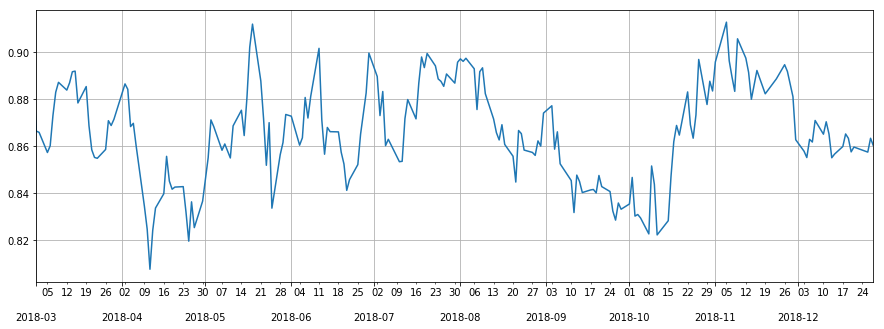

In [18]:
fig, ax = plt.subplots()


ax.plot(stock1['PRECO FECHAMENTO']/stock2['PRECO FECHAMENTO'])



ax.set_xlim(['2018-03-01', '2018-12-28'])
ax.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y-%m'))
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

In [32]:
df_pares

,Empresa1,Empresa2,Correlacao
0,ELET3,ELET6,0.993322
1,CMIG4,CMIG3,0.991439
2,PETR3,PETR4,0.981360
3,BBDC3,BBDC4,0.978631
4,PARD3,UGPA3,0.966861
5,BBAS3,ELET3,0.966467
6,ELET6,BBAS3,0.964377
7,BBDC4,CYRE3,0.961438
8,EZTC3,CYRE3,0.959813
9,QUAL3,CIEL3,0.957738


In [54]:
stock1 = pd.read_csv('HISTORICO_2018/' + df_pares.iloc[5]['Empresa1'] + '_2018', index_col = 'DATA DO PREGAO', parse_dates=True)
stock2 = pd.read_csv('HISTORICO_2018/' + df_pares.iloc[5]['Empresa2'] + '_2018', index_col = 'DATA DO PREGAO', parse_dates=True)
df = pd.DataFrame()
df['Empresa1'] = stock1['PRECO FECHAMENTO']
df['Empresa2'] = stock2['PRECO FECHAMENTO']
df['Par'] = stock1.iloc[0]['CODIGO DE NEGOCIACAO DO PAPEL'] + '/' + stock2.iloc[0]['CODIGO DE NEGOCIACAO DO PAPEL']
df['Ratio'] = stock1['PRECO FECHAMENTO']/stock2['PRECO FECHAMENTO']
df['MA_40'] = df['Ratio'].rolling(window=40).mean()
df['STD_40'] = df['Ratio'].rolling(window=40).std()
df['BANDA_1_40 SUPERIOR'] = df['MA_40'] + 2* df['STD_40']
df['BANDA_1_40 INFERIOR'] = df['MA_40'] - 2* df['STD_40']
df['BANDA_2_40 SUPERIOR'] = df['MA_40'] + 3* df['STD_40']
df['BANDA_2_40 INFERIOR'] = df['MA_40'] - 3* df['STD_40']
df['BANDA_3_40 SUPERIOR'] = df['MA_40'] + 4* df['STD_40']
df['BANDA_3_40 INFERIOR'] = df['MA_40'] - 4* df['STD_40']

In [55]:
df.tail()

,Empresa1,Empresa2,Par,Ratio,MA_40,STD_40,BANDA_1_40 SUPERIOR,BANDA_1_40 INFERIOR,BANDA_2_40 SUPERIOR,BANDA_2_40 INFERIOR,BANDA_3_40 SUPERIOR,BANDA_3_40 INFERIOR
DATA DO PREGAO,,,,,,,,,,,,
2018-12-20,44.08,23.10,BBAS3/ELET3,1.908225,1.791774,0.046638,1.885049,1.698498,1.931687,1.651861,1.978324,1.605223
2018-12-21,44.09,22.70,BBAS3/ELET3,1.942291,1.795338,0.052358,1.900053,1.690622,1.952411,1.638265,2.004768,1.585907
2018-12-26,44.38,22.42,BBAS3/ELET3,1.979483,1.798760,0.059511,1.917781,1.679739,1.977291,1.620228,2.036802,1.560718
2018-12-27,45.12,23.93,BBAS3/ELET3,1.885499,1.800412,0.060997,1.922407,1.678417,1.983404,1.617420,2.044401,1.556422
2018-12-28,46.49,24.23,BBAS3/ELET3,1.918696,1.802903,0.063751,1.930405,1.675402,1.994156,1.611651,2.057906,1.547900


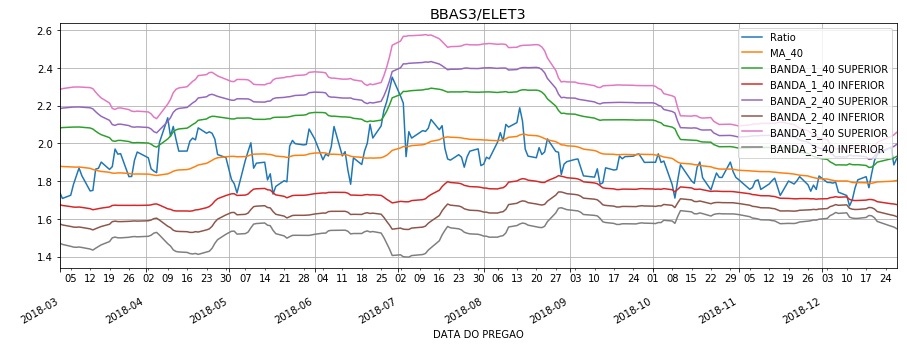

In [56]:
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

stock_plt = df[['Ratio','MA_40','BANDA_1_40 SUPERIOR','BANDA_1_40 INFERIOR','BANDA_2_40 SUPERIOR','BANDA_2_40 INFERIOR','BANDA_3_40 SUPERIOR','BANDA_3_40 INFERIOR']].plot
title_stg = df.iloc[0]['Par']

stock_plt = stock_plt.line(title = title_stg)

stock_plt.set_xlim(['2018-03-01', '2018-12-28'])
stock_plt.grid()
stock_plt.xaxis.set_major_locator(dates.MonthLocator())
stock_plt.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y-%m'))
stock_plt.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0))
stock_plt.xaxis.set_minor_formatter(dates.DateFormatter('%d'))